In [193]:
import tensorflow as tf

In [194]:
tf.__version__

'2.12.0'

In [195]:
# import some basic libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [196]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
## divide the dataset into independant and dependant features
X = dataset.iloc[: , 3:13]
y = dataset.iloc[: , 13]

In [198]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [199]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [200]:
## Feature Enginneering
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [201]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [202]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [203]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [204]:
X = pd.concat([X , geography , gender] , axis = 1 )

In [205]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [206]:
## splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=0)

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [208]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [209]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [210]:
X_train.shape

(8000, 11)

In [211]:
X_test.shape

(2000, 11)

# Lets Create ANN

In [212]:
## Lets create ANN using tensorflow

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU
from tensorflow.keras.layers import Dropout

In [214]:
## lets initialize the ANN
classifier = Sequential()

In [215]:
## adding input layer
classifier.add(Dense(units = 11 , activation = 'relu'))


In [216]:
## adding the first hidden layer
classifier.add(Dense(units = 7 , activation = 'relu'))
classifier.add(Dropout(0.2))

In [217]:
## adding second hideen layer
classifier.add(Dense(units = 6 , activation = 'relu'))
classifier.add(Dropout(0.2))

In [218]:
classifier.add(Dense(1, activation = 'sigmoid'))

## Adam defines learning rate default as 0.01

In [219]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [220]:
classifier.compile(optimizer=opt , loss = 'binary_crossentropy', metrics = ['accuracy'])

## or use this code 
## classifier.compile(optimizer='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [221]:
# model_history = classifier.fit(X_train , y_train, validation_split= 0.33 , batch_size = 10 , epochs = 1000 )

### Stop training when model stops improving

In [222]:
## Early Stopping 
## use random parameters
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [223]:
model_history = classifier.fit(X_train , y_train, validation_split= 0.33 , batch_size = 10 , epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4740 - accuracy: 0.7957 - val_loss: 0.4375 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.7962 - val_loss: 0.4050 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4138 - accuracy: 0.8039 - val_loss: 0.3903 - val_accuracy: 0.8296
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3990 - accuracy: 0.8322 - val_loss: 0.3994 - val_accuracy: 0.8429
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3938 - accuracy: 0.8393 - val_loss: 0.3791 - val_accuracy: 0.8474
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3947 - accuracy: 0.8427 - val_loss: 0.3806 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3910 - accuracy: 0.8408 - val_loss: 0.3922 - val_accuracy:

In [224]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

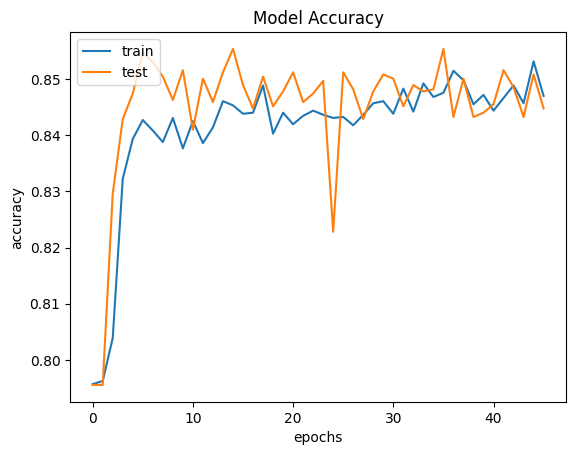

In [225]:
# Summarize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

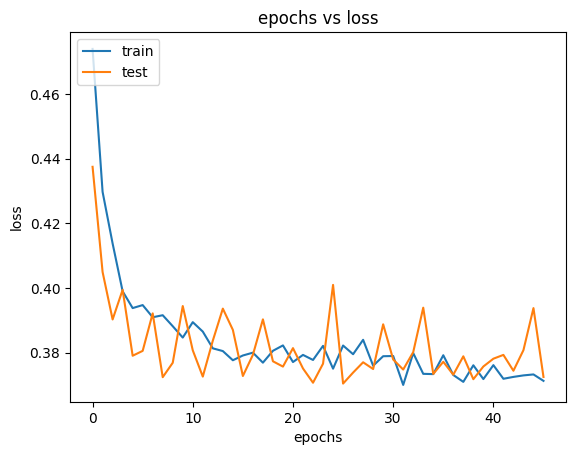

In [226]:
# Summarise hostory for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [227]:
# Making preditction for test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 566us/step


In [228]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1530,   65],
       [ 212,  193]], dtype=int64)

In [229]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)

In [230]:
score

0.8615

In [231]:
## get the weights 
classifier.get_weights()

[array([[ 1.80224292e-02,  5.95828652e-01, -9.08704102e-02,
          9.87225175e-02, -1.83776412e-02, -6.68326467e-02,
          3.64235081e-02, -8.82549226e-01, -3.01047057e-01,
         -7.92581797e-01,  7.22409368e-01],
        [ 2.99725151e+00, -1.30513835e+00,  6.23188198e-01,
          3.31486195e-01, -2.18254852e+00,  2.02877927e+00,
         -1.04327953e+00, -1.69232249e+00, -9.06788588e-01,
          2.07060242e+00, -1.39775550e+00],
        [-4.77317385e-02,  9.74193096e-01, -3.81591350e-01,
         -6.50167093e-02, -6.97626710e-01,  5.33941500e-02,
         -9.53250751e-02, -6.16807163e-01,  2.74837226e-01,
         -1.33692205e+00,  3.35826814e-01],
        [-6.57119006e-02, -1.97009277e+00,  5.35260260e-01,
         -3.46776652e+00, -1.86373949e+00, -1.20516729e+00,
         -6.16035759e-01, -3.36203933e-01, -4.56794351e-01,
         -1.99994817e-01, -1.88164508e+00],
        [-1.07478940e+00, -1.40158251e-01,  3.77706695e+00,
         -3.54439664e+00, -5.26616573e-01, -

# Blackbox vs Whitebox models

Linear Regression , logistic regression , decision tree , Knn ,kmeans are white box mmodels as we can see whats happening behind
ANN , CNN , RNN , RandomForest , XGboost , Adaboost are blackbox models